In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np
from keras.utils.np_utils import to_categorical

In [2]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
test.shape

(28000, 784)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

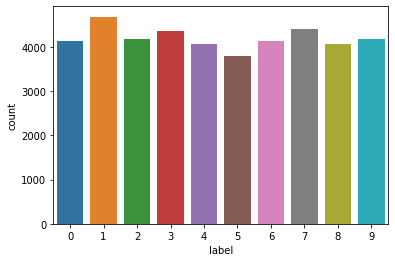

In [5]:
sns.countplot(train['label'])

In [6]:
x_train=train.drop(['label'],1)
y_train=train['label']

In [7]:
x_train=np.array(x_train)
test=np.array(test)

In [8]:
x_train.shape

(42000, 784)

In [9]:
test.shape

(28000, 784)

In [10]:
x_train=x_train.reshape(42000,28,28)
test=test.reshape(28000,28,28)

In [11]:
x_train=x_train/255
test=test/255

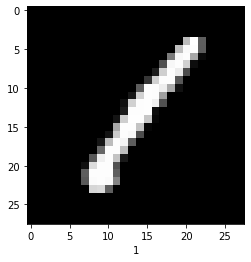

In [12]:
def show_img(i):
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(y_train[i])
show_img(0)

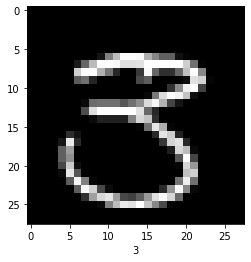

In [13]:
show_img(7)

In [14]:
target=x_train.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

In [33]:
y_train=np.array(y_train)

In [34]:
label=to_categorical(y_train)

In [35]:
label.shape

(42000, 10)

In [36]:
label[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [73]:
model=Sequential([
    Conv2D(32,(5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [74]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model.fit(target,label,epochs=3,batch_size=64)

Epoch 1/3
657/657 [==============================] - 31s 47ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 2/3
657/657 [==============================] - 31s 47ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 3/3
657/657 [==============================] - 31s 47ms/step - loss: 0.0246 - accuracy: 0.9923


In [ ]:
model1=Sequential([
    Conv2D(32,(5,5) , activation='relu' , input_shape=(28,28,1)),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3), activation ='relu'),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [87]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [88]:
from sklearn.metrics import accuracy_score
answ=pd.read_csv('submission.csv')
accuracy_score(answ['Label'],Y_pred_classes)

0.9913571428571428

In [89]:
0.9908571428571429
# 2 pochs =  0.9842142857142857
# 15 epochs first modle =0.9913571428571428

0.9908571428571429

In [177]:
submission = pd.read_csv('submission.csv')
submission['Label'] = Y_pred_classes
submission.to_csv("my_submission3.csv", index=False)